### K-Means Algorithm - Iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)
pca = PCA(2)
iris_pca = pca.fit_transform(iris_std)

##### 1. 군집화(Clustering)

In [4]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [5]:
kmeans = KMeans(n_clusters=3,verbose=3,random_state=2023)
kmeans.fit(iris_std)            # 비지도 학습이라 y 값 안줌

Initialization complete
Iteration 0, inertia 275.4536786153434.
Iteration 1, inertia 140.34880648377612.
Iteration 2, inertia 139.9942559949211.
Iteration 3, inertia 139.86727930745184.
Iteration 4, inertia 139.82543466174204.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 180.06251207345534.
Iteration 1, inertia 140.35239349268556.
Iteration 2, inertia 140.0820210962167.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 215.7068035750595.
Iteration 1, inertia 140.60084911688676.
Iteration 2, inertia 140.2280000720398.
Iteration 3, inertia 140.08951698482218.
Iteration 4, inertia 140.0327527742865.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 269.5855479055217.
Iteration 1, inertia 142.6343217012907.
Iteration 2, inertia 140.90153181202442.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 179.0225276461317.
Iteratio

c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2023, verbose=3)

In [6]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
# 학습 결과 넘버링은 집단이 큰 순서부터 부여
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([52, 50, 48], dtype=int64))

##### 2.시각화

In [11]:
df = pd.DataFrame(iris_pca,columns=['PC1','PC2'])
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head(54).tail(5)

,PC1,PC2,target,cluster
49,-2.203833,0.009216,0,1
50,1.101781,0.862972,1,2
51,0.731337,0.594615,1,2
52,1.240979,0.616298,1,2
53,0.407483,-1.754404,1,0


In [12]:
df.groupby(['target','cluster'])[['PC1']].count()

PC1
target cluster     
0      1         50
1      0         38
       2         12
2      0         14
       2         36

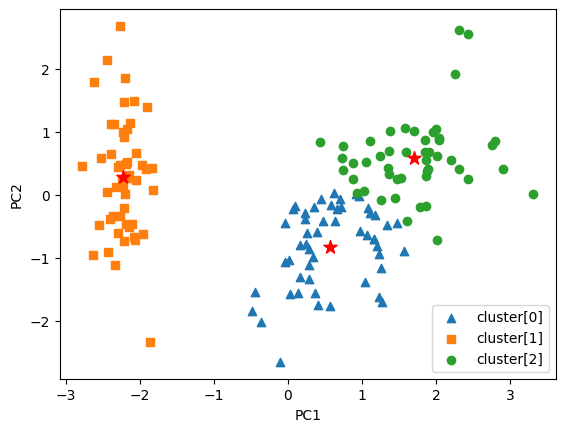

In [20]:
markers = ['^','s','o'] 

for i,marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data,y_data,marker=marker,label='cluster'+str([i]))
    plt.scatter(x_data.mean(),y_data.mean(),marker='*',c='red',s=100)
plt.legend()
plt.xlabel('PC1'),plt.ylabel('PC2');

- PCA Original Data 와 비교

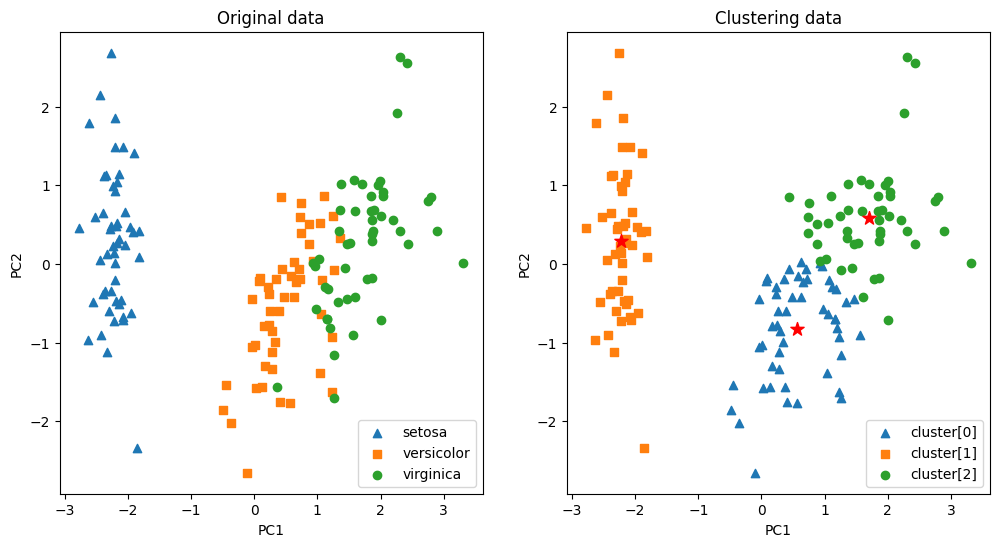

In [21]:
plt.figure(figsize=(12,6))
for k,column in enumerate(['target','cluster']):
    plt.subplot(1,2,k+1)
    for i,marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data,y_data,marker=marker,label=iris.target_names[i])
        else:
            plt.scatter(x_data,y_data,marker=marker,label='cluster'+str([i]))
            plt.scatter(x_data.mean(),y_data.mean(),marker='*',c='red',s=100)

    
    plt.legend()
    plt.xlabel('PC1'),plt.ylabel('PC2')
    if k == 0:
        plt.title('Original data');
    else:
        plt.title('Clustered data');
